In [8]:
import pandas as pd

df = pd.read_csv("Sleep_health.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:

# ================================
# 1. Import Libraries
# ================================
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [9]:

df.isnull().sum()


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:

df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [11]:

df['Sleep Disorder'] = df['Sleep Disorder'].replace(
    ["NaN", "nan", "NULL", "Null", "", " ", "None", "?"], 
    pd.NA
)
df['Sleep Disorder'].fillna("No Disorder", inplace=True)

C:\Users\ACM\AppData\Local\Temp\ipykernel_22248\2238897519.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna("No Disorder", inplace=True)


In [12]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
df['BMI Category'].value_counts()


BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [15]:
df["Gender"].unique()


array(['Male', 'Female'], dtype=object)

In [16]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["BMI Category"] = df["BMI Category"].map({"Normal": 0, "Normal Weight": 1,"Obese":3,"Overweight":4})

In [17]:
df["Gender"]


0      0
1      0
2      0
3      0
4      0
      ..
369    1
370    1
371    1
372    1
373    1
Name: Gender, Length: 374, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in df.select_dtypes('object').columns:
     df[cols]=le.fit_transform(df[cols])

In [19]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,9,6.1,6,42,6,4,11,77,4200,1
1,2,0,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,0,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,0,28,6,5.9,4,30,8,3,22,85,3000,2
4,5,0,28,6,5.9,4,30,8,3,22,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,5,8.1,9,75,3,4,23,68,7000,2
370,371,1,59,5,8.0,9,75,3,4,23,68,7000,2
371,372,1,59,5,8.1,9,75,3,4,23,68,7000,2
372,373,1,59,5,8.1,9,75,3,4,23,68,7000,2


In [20]:
df.skew()


Person ID                  0.000000
Gender                     0.021478
Age                        0.257222
Occupation                 0.745327
Sleep Duration             0.037554
Quality of Sleep          -0.207448
Physical Activity Level    0.074487
Stress Level               0.154330
BMI Category               0.296808
Blood Pressure            -0.181284
Heart Rate                 1.224824
Daily Steps                0.178277
Sleep Disorder            -0.002448
dtype: float64

In [21]:

df["Heart Rate_log"] = np.log1p(df["Heart Rate"])  
df['Occupation_log']=np.log1p(df['Occupation'])

In [23]:
df.skew()

Person ID                  0.000000
Gender                     0.021478
Age                        0.257222
Occupation                 0.745327
Sleep Duration             0.037554
Quality of Sleep          -0.207448
Physical Activity Level    0.074487
Stress Level               0.154330
BMI Category               0.296808
Blood Pressure            -0.181284
Heart Rate                 1.224824
Daily Steps                0.178277
Sleep Disorder            -0.002448
Heart Rate_log             1.003175
Occupation_log            -0.265934
dtype: float64

In [24]:
df.drop(["Heart Rate","Occupation","Person ID"],axis=1,inplace=True)


In [25]:
import matplotlib.pyplot as plt


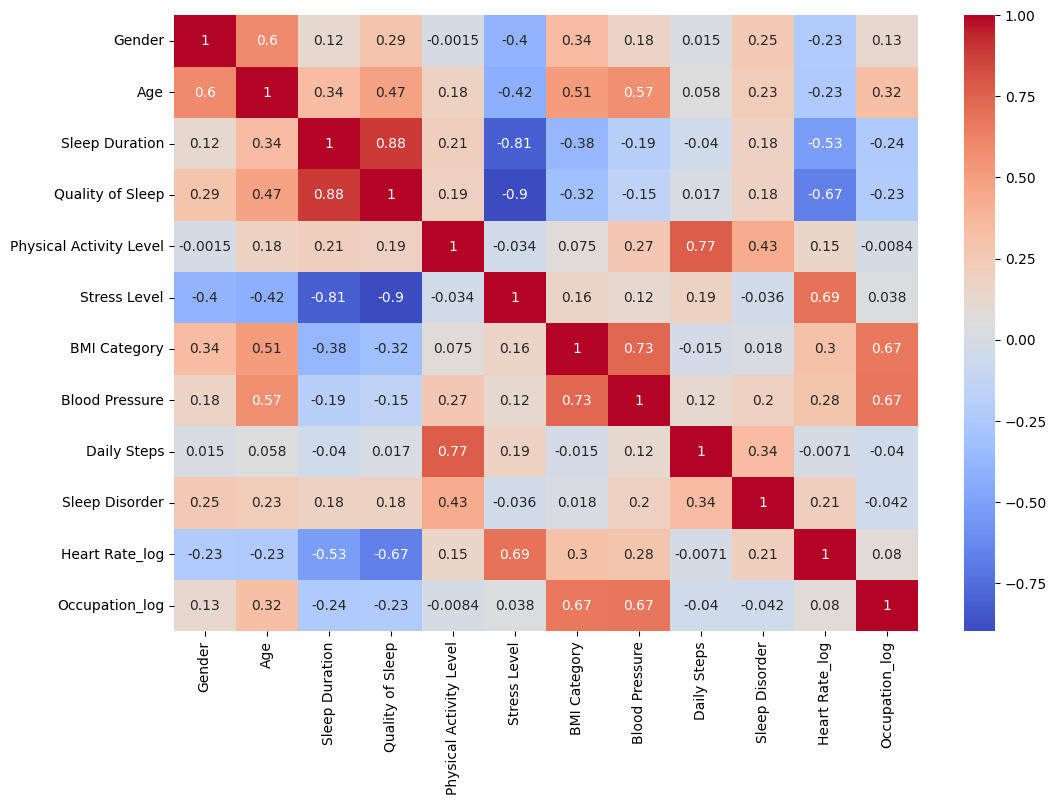

In [26]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [27]:
df.drop(["Sleep Duration","BMI Category"],axis=1,inplace=True)

In [28]:
df.columns


Index(['Gender', 'Age', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Blood Pressure', 'Daily Steps', 'Sleep Disorder',
       'Heart Rate_log', 'Occupation_log'],
      dtype='object')

In [29]:

X=df.drop(['Sleep Disorder','Blood Pressure'],axis=1)
y=df[['Sleep Disorder']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 5. Scaling
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM Model (baseline model)

In [31]:
from sklearn.svm import SVC

model = SVC()  # RBF kernel works best usually

# Train
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


# 7. Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      0.95      0.94        43
           2       0.86      0.75      0.80        16

    accuracy                           0.88        75
   macro avg       0.85      0.84      0.84        75
weighted avg       0.88      0.88      0.88        75



c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Hyperparameter Tuning

Key SVM Parameters

 ## 1. C (Regularization strength  )

# Controls how much the model tolerates misclassified points.
 ## Small C → more regularization → wider margin → model is simpler but may underfit.
 ## Large C  → less regularization → tries to classify every point correctly → may overfit.

 ## 2. kernel

# Defines how the model draws the decision boundary.

# linear → straight line boundary; best when data is linearly separable.
 ##  rbf → curved/complex boundaries; works best for most datasets.
# poly → polynomial curved boundaries; degree controls complexity.
# sigmoid → rarely useful; behaves like neural networks.


## 3. gamma (only for rbf, poly, sigmoid) 

# Controls how far influence of a single training point spreads.

# Low gamma → broader influence → smoother decision boundary.
#  High gamma  → small influence → boundary becomes very tight around points → risk of overfitting.


### 4. degree (only for poly kernel)

# Power of the polynomial.
# Higher degree → more complex curves## → more overfitting risk.



 ## 5. coef0 (poly & sigmoid kernels)

# Controls how much influence higher-degree vs lower-degree polynomial terms have.
# Most beginners don’t need to tune this.



### 6. probability

# Set `probability=True` if you want probability estimates (like predict_proba).
# Makes training slower.



In [62]:
model = SVC(kernel="rbf", C=3, gamma="scale")  # adjust the parameters

# Train
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


# 7. Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.95      0.95      0.95        43
           2       0.85      0.69      0.76        16

    accuracy                           0.87        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.87      0.87      0.87        75



c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={
    'C':[0.01,0.1,1,2,10],
    'kernel':['linear','rbf','poly'],
    'degree':[3,4,5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}


random_svmmodel=RandomizedSearchCV(SVC(random_state=42),param_grid,cv=3,scoring='accuracy',n_iter=30)
random_svmmodel.fit(X_train_scaled, y_train)
print("BEST PARAMETERS Random Search:",random_svmmodel.best_params_)
print("BEST SCORE Randome search:",random_svmmodel.best_score_)

c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversio

BEST PARAMETERS Random Search: {'kernel': 'poly', 'gamma': 1, 'degree': 5, 'C': 2}
BEST SCORE Randome search: 0.9096632996632996


c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversio

In [64]:

random_best_model = random_svmmodel.best_estimator_

y_pred = random_best_model.predict(X_test_scaled)


# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.93      0.95      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.87        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.87      0.87      0.87        75



Grid Search

In [66]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 2, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# GridSearch model
grid_svm_model = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit on training data
grid_svm_model.fit(X_train_scaled, y_train)

# Best params and CV accuracy
print("GridSearch BEST PARAMETERS :", grid_svm_model.best_params_)
print("GridSearch BEST SCORE:", grid_svm_model.best_score_)

GridSearch BEST PARAMETERS : {'C': 0.01, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
GridSearch BEST SCORE: 0.9096632996632996


c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
grid_best_model = grid_svm_model.best_estimator_

y_pred = grid_best_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.93      0.95      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.87        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.87      0.87      0.87        75

